# Sentiment Analysis of Financial News Using NLTK

In [ ]:
import pandas as pd
import numpy as np
import re
import string


#import stopwords and text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfTransformer

# Basic EDA on cnbc_headlines dataset

In [ ]:
cnbc_headlines= pd.read_csv('/content/cnbc_headlines.csv')


In [ ]:
cnbc_headlines.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [ ]:
cnbc_headlines.shape


(3080, 3)

In [ ]:
cnbc_headlines.columns


Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
cnbc_headlines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [ ]:
cnbc_headlines.isnull().sum()


Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [ ]:
cnbc_headlines=cnbc_headlines.dropna()


In [ ]:
cnbc_headlines.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [ ]:
cnbc_headlines=cnbc_headlines.drop_duplicates(subset=['Headlines','Description'],keep='first')
cnbc_headlines.reset_index(drop=True,inplace=True)
cnbc_headlines


,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2785,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2786,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2787,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2788,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [ ]:
cnbc_headlines.shape


(2790, 3)

# Basic EDA on Gaurdian headlines dataset

In [ ]:
guardian_headlines=pd.read_csv('/content/guardian_headlines.csv.zip')


In [ ]:
guardian_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [ ]:
guardian_headlines.shape


(17800, 2)

In [ ]:
guardian_headlines.columns


Index(['Time', 'Headlines'], dtype='object')

In [ ]:
guardian_headlines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [ ]:
guardian_headlines.isnull().sum()


Time         0
Headlines    0
dtype: int64

In [ ]:
guardian_headlines= guardian_headlines.drop_duplicates(subset=['Headlines'],keep='first')
guardian_headlines.reset_index(drop=True,inplace=True)
guardian_headlines


,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17790,17-Dec-17,How investing in solar energy can create a bri...
17791,17-Dec-17,Poundland suppliers hit by insurance downgrade
17792,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17793,17-Dec-17,Unilever sells household name spreads to KKR f...


In [ ]:
guardian_headlines.shape

(17795, 2)

# Basic EDA on reuters headlines

In [ ]:
reuters_headlines= pd.read_csv('/content/reuters_headlines.csv.zip')


In [ ]:
reuters_headlines.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [ ]:
reuters_headlines.shape


(32770, 3)

In [ ]:
reuters_headlines.columns


Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
reuters_headlines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [ ]:
reuters_headlines.isnull().sum()


Headlines      0
Time           0
Description    0
dtype: int64

In [ ]:
reuters_headlines=reuters_headlines.drop_duplicates(subset=['Headlines','Description'],keep='first')
reuters_headlines.reset_index(drop=True,inplace=True)
reuters_headlines

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [ ]:
reuters_headlines.shape

(32673, 3)

#Making some functions that we will need  ahead

Preprocessing 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [ ]:
def preprocessing(text):
  text=text.lower()
  text=text.translate(str.maketrans("","",string.punctuation))
  stop_word=set(stopwords.words('english'))
  text_tokens=word_tokenize(text)
  filtered_words=[word for word in text_tokens if word not in stop_word]
  ps=PorterStemmer()
  Stemmed_words=[ps.stem(w) for w in filtered_words]
  lemmatizer=WordNetLemmatizer()
  lemma_words=[lemmatizer.lemmatize(w,pos='a') for w in Stemmed_words]
  return " ".join(lemma_words)
 
 


  

SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer= SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def get_analysis(score):
  if score<0.0:
    return 'Negative'
  elif score==0.0:
    return 'Neutral'
  else:
    return 'Positive'    


# Now working with description on datasets

In [ ]:
new_data=pd.concat([cnbc_headlines,reuters_headlines],axis=0)


In [ ]:
new_data.shape


(35463, 3)

In [ ]:
new_data_copy=new_data.copy()


In [ ]:
new_data['Description']=new_data['Description'].apply(preprocessing)
new_data.head()



,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...


In [ ]:
ds_score=[]
for value in new_data['Description'].values:
  ds_score.append(analyzer.polarity_scores(value)['compound'])
new_data['ds_score']= ds_score
new_data  


,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,-0.6486
...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,0.0000
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,0.0000
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,-0.2732
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,-0.3818


In [ ]:
new_data['ds_score']=new_data['ds_score'].apply(get_analysis)
new_data


,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative
...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


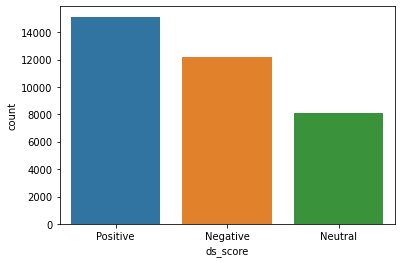

In [ ]:
import seaborn as sns
sns.countplot(x='ds_score',data=new_data)


In the description 

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

In [ ]:
import plotly.express as px
fig=px.pie(new_data,names='ds_score',title='Pie chart of different sentiments')
fig.show()


In the dataset 

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description 

In [ ]:
x_train_ds,x_test_ds,y_train_ds,y_test_ds=train_test_split(new_data['Description'],new_data.ds_score,test_size=0.1,random_state=212)


LINEAR SUPPORT VECTOR MACHINE


In [ ]:
pipe= Pipeline([('tfidf',TfidfVectorizer()),
                ('model',LinearSVC())])
linear_svc_model_ds=pipe.fit(x_train_ds,y_train_ds)
prediction=linear_svc_model_ds.predict(x_test_ds)
print('MODEL-LINEAR SVC')
accuracy_LSVC_D= print("accuracy score: {}%".format(round(accuracy_score(y_test_ds,prediction)*100,2)))
print(confusion_matrix(y_test_ds,prediction))
print(classification_report(y_test_ds,prediction))

MODEL-LINEAR SVC
accuracy score: 93.43%
[[1122   48   54]
 [  26  771   19]
 [  53   33 1421]]
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
    Positive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547



LOGISTIC REGRESSION


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',LogisticRegression())])
log_model_ds=pipe.fit(x_train_ds,y_train_ds)
prediction=log_model_ds.predict(x_test_ds)
print('MODEL-LOGISTIC REGRESSION')
accuracy_Log_D= print("accuracy score: {}%".format(round(accuracy_score(y_test_ds,prediction)*100,2)))
print(confusion_matrix(y_test_ds,prediction))
print(classification_report(y_test_ds,prediction))
 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL-LOGISTIC REGRESSION
accuracy score: 89.48%
[[1048   93   83]
 [  44  740   32]
 [  69   52 1386]]
              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
    Positive       0.92      0.92      0.92      1507

    accuracy                           0.89      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.89      0.89      3547



MULTINOMIAL NAIVE BAYES


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',MultinomialNB())])
MultinomialNB_model_ds=pipe.fit(x_train_ds,y_train_ds)
prediction=MultinomialNB_model_ds.predict(x_test_ds)
print('MultinomialNaive Bayes')
accuracy_MNB_D= print("accuracy score: {}%".format(round(accuracy_score(y_test_ds,prediction)*100,2)))
print(confusion_matrix(y_test_ds,prediction))
print(classification_report(y_test_ds,prediction))
 

MultinomialNaive Bayes
accuracy score: 62.31%
[[ 729    8  487]
 [ 155   98  563]
 [ 117    7 1383]]
              precision    recall  f1-score   support

    Negative       0.73      0.60      0.66      1224
     Neutral       0.87      0.12      0.21       816
    Positive       0.57      0.92      0.70      1507

    accuracy                           0.62      3547
   macro avg       0.72      0.54      0.52      3547
weighted avg       0.69      0.62      0.57      3547



BERNOULLI NAIVE BAYES


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',BernoulliNB())])
BernoulliNB_model_ds=pipe.fit(x_train_ds,y_train_ds)
prediction=BernoulliNB_model_ds.predict(x_test_ds)
print('BernoulliNaive Bayes')
accuracy_BNB_D= print("accuracy score: {}%".format(round(accuracy_score(y_test_ds,prediction)*100,2)))
print(confusion_matrix(y_test_ds,prediction))
print(classification_report(y_test_ds,prediction))


BernoulliNaive Bayes
accuracy score: 73.61%
[[ 879   70  275]
 [ 127  496  193]
 [ 198   73 1236]]
              precision    recall  f1-score   support

    Negative       0.73      0.72      0.72      1224
     Neutral       0.78      0.61      0.68       816
    Positive       0.73      0.82      0.77      1507

    accuracy                           0.74      3547
   macro avg       0.74      0.72      0.73      3547
weighted avg       0.74      0.74      0.73      3547



GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',GradientBoostingClassifier(loss='deviance',learning_rate=0.01,n_estimators=10,max_depth=5,random_state=55))])
GB_model_ds=pipe.fit(x_train_ds,y_train_ds)
prediction=GB_model_ds.predict(x_test_ds)
print('Gradient Boost')
accuracy_GBC_D= print("accuracy score: {}%".format(round(accuracy_score(y_test_ds,prediction)*100,2)))
print(confusion_matrix(y_test_ds,prediction))
print(classification_report(y_test_ds,prediction))


Gradient Boost
accuracy score: 42.68%
[[   9    0 1215]
 [   0    0  816]
 [   2    0 1505]]
              precision    recall  f1-score   support

    Negative       0.82      0.01      0.01      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.43      1.00      0.60      1507

    accuracy                           0.43      3547
   macro avg       0.41      0.34      0.20      3547
weighted avg       0.46      0.43      0.26      3547



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',XGBClassifier(loss='deviance',learning_rate=0.01,n_estimators=10,max_depth=5,random_state=2020))])
XGB_model_ds=pipe.fit(x_train_ds,y_train_ds)
prediction=XGB_model_ds.predict(x_test_ds)
print('XGBoost')
accuracy_XGBC_D= print("accuracy score: {}%".format(round(accuracy_score(y_test_ds,prediction)*100,2)))
print(confusion_matrix(y_test_ds,prediction))
print(classification_report(y_test_ds,prediction))


XGBoost
accuracy score: 49.62%
[[ 289    1  934]
 [   2    0  814]
 [  36    0 1471]]
              precision    recall  f1-score   support

    Negative       0.88      0.24      0.37      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.46      0.98      0.62      1507

    accuracy                           0.50      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.50      0.50      0.39      3547



DECISION TREE CLASSIFICATION MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='best',random_state=2020))])
DT_model_ds=pipe.fit(x_train_ds,y_train_ds)
prediction=DT_model_ds.predict(x_test_ds)
print('Decision Tree')
accuracy_DT_D= print("accuracy score: {}%".format(round(accuracy_score(y_test_ds,prediction)*100,2)))
print(confusion_matrix(y_test_ds,prediction))
print(classification_report(y_test_ds,prediction))


Decision Tree
accuracy score: 51.2%
[[1088    1  135]
 [ 809    0    7]
 [ 779    0  728]]
              precision    recall  f1-score   support

    Negative       0.41      0.89      0.56      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.84      0.48      0.61      1507

    accuracy                           0.51      3547
   macro avg       0.41      0.46      0.39      3547
weighted avg       0.50      0.51      0.45      3547



K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='brute'))])
KNN_model_ds=pipe.fit(x_train_ds,y_train_ds)
prediction=KNN_model_ds.predict(x_test_ds)
print('K Nearest Neighbors')
accuracy_KNN_D= print("accuracy score: {}%".format(round(accuracy_score(y_test_ds,prediction)*100,2)))
print(confusion_matrix(y_test_ds,prediction))
print(classification_report(y_test_ds,prediction))


K Nearest Neighbors
accuracy score: 57.26%
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
    Positive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547



In [ ]:
def compare_models(models,names,x_train_ds,y_train_ds,x_test_ds,y_test_ds):
  import sklearn.metrics as metrics
  from sklearn.model_selection import train_test_split
  for (model,name) in zip(models,names):
    y_pred= model.predict(x_test_ds)
    res=classification_report(y_test_ds,y_pred)
    print('Classification Report',res)
    

    

In [ ]:
models=[linear_svc_model_ds,log_model_ds,MultinomialNB_model_ds,BernoulliNB_model_ds,GB_model_ds,XGB_model_ds,DT_model_ds,KNN_model_ds]
names=['linearSVC','logistic','MultinomialNB','BernoulliNB','gradientBoost','XGB','decisionTree','knn']
compare_models(models,names,x_train_ds,y_train_ds,x_test_ds,y_test_ds)

Classification Report               precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
    Positive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

Classification Report               precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
    Positive       0.92      0.92      0.92      1507

    accuracy                           0.89      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.89      0.89      3547

Classification Report               precision    recall  f1-score   support

    Negative       0.73      0.60      0.66      1224
     Neutral       0.87      0.12      0.21       816
    Posit

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report               precision    recall  f1-score   support

    Negative       0.82      0.01      0.01      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.43      1.00      0.60      1507

    accuracy                           0.43      3547
   macro avg       0.41      0.34      0.20      3547
weighted avg       0.46      0.43      0.26      3547

Classification Report               precision    recall  f1-score   support

    Negative       0.88      0.24      0.37      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.46      0.98      0.62      1507

    accuracy                           0.50      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.50      0.50      0.39      3547

Classification Report               precision    recall  f1-score   support

    Negative       0.41      0.89      0.56      1224
     Neutral       0.00      0.00      0.00       816
    Posit

# working with test dataset

In [ ]:
y_predicted=linear_svc_model_ds.predict(x_test_ds)
y_predicted


array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Neutral'], dtype=object)

In [ ]:
predictions=pd.DataFrame(y_predicted)


In [ ]:
predictions.head()

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive


# Now working with headlines + description

In [ ]:
new_data.head()


,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative


In [ ]:
new_data['info']=new_data['Headlines']+new_data['Description']
new_data.head()


,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative,Wall Street delivered the 'kind of pullback I'...


In [ ]:
new_data=new_data.drop(columns=['Headlines','Description','ds_score'])
new_data.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [ ]:
new_data['info']=new_data['info'].apply(preprocessing)
new_data.head()
 

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...


In [ ]:
info_score=[]
for value in new_data['info'].values:
  info_score.append(analyzer.polarity_scores(value)['compound'])
new_data['info_score']=info_score
new_data  


,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,0.7964
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,0.0000
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,0.3612
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,0.8625
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,-0.2263
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,-0.2732
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,-0.3818


In [ ]:
new_data['info_score']=new_data['info_score'].apply(get_analysis)
new_data


,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,Negative
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


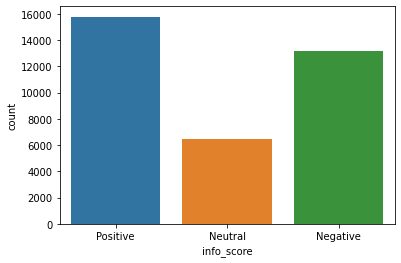

In [ ]:
sns.countplot(x='info_score',data=new_data)


In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

In [ ]:
fig=px.pie(new_data,names='info_score',title='Pie chart of different sentiments')
fig.show()


In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [ ]:
X_train_hl_ds,X_test_hl_ds,Y_train_hl_ds,Y_test_hl_ds=train_test_split(new_data['info'],new_data.info_score,test_size=0.1,random_state=212)


LINEAR SUPPORT VECTOR MACHINE


In [ ]:
pipe= Pipeline([('tfidf',TfidfVectorizer()),
                ('model',LinearSVC())])
linear_svc_model_hl_ds=pipe.fit(X_train_hl_ds,Y_train_hl_ds)
prediction=linear_svc_model_hl_ds.predict(X_test_hl_ds)
print('MODEL-LINEAR SVC')
print("accuracy score: {}%".format(round(accuracy_score(Y_test_hl_ds,prediction)*100,2)))
print(confusion_matrix(Y_test_hl_ds,prediction))
print(classification_report(Y_test_hl_ds,prediction))


MODEL-LINEAR SVC
accuracy score: 90.7%
[[1183   57   83]
 [  45  565   48]
 [  55   42 1469]]
              precision    recall  f1-score   support

    Negative       0.92      0.89      0.91      1323
     Neutral       0.85      0.86      0.85       658
    Positive       0.92      0.94      0.93      1566

    accuracy                           0.91      3547
   macro avg       0.90      0.90      0.90      3547
weighted avg       0.91      0.91      0.91      3547



LOGISTIC REGRESSION


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',LogisticRegression())])
log_model_hl_ds=pipe.fit(X_train_hl_ds,Y_train_hl_ds)
prediction=log_model_hl_ds.predict(X_test_hl_ds)
print('MODEL-LOGISTIC REGRESSION')
print("accuracy score: {}%".format(round(accuracy_score(Y_test_hl_ds,prediction)*100,2)))
print(confusion_matrix(Y_test_hl_ds,prediction))
print(classification_report(Y_test_hl_ds,prediction))
 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL-LOGISTIC REGRESSION
accuracy score: 86.86%
[[1139   68  116]
 [  81  495   82]
 [  80   39 1447]]
              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      1323
     Neutral       0.82      0.75      0.79       658
    Positive       0.88      0.92      0.90      1566

    accuracy                           0.87      3547
   macro avg       0.86      0.85      0.85      3547
weighted avg       0.87      0.87      0.87      3547



MULTINOMIAL NAIVE BAYES


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',MultinomialNB())])
MultinomialNB_model_hl_ds=pipe.fit(X_train_hl_ds,Y_train_hl_ds)
prediction=MultinomialNB_model_hl_ds.predict(X_test_hl_ds)
print('MultinomialNaive Bayes')
print("accuracy score: {}%".format(round(accuracy_score(Y_test_hl_ds,prediction)*100,2)))
print(confusion_matrix(Y_test_hl_ds,prediction))
print(classification_report(Y_test_hl_ds,prediction))
 

MultinomialNaive Bayes
accuracy score: 62.9%
[[ 780    1  542]
 [ 145    9  504]
 [ 122    2 1442]]
              precision    recall  f1-score   support

    Negative       0.74      0.59      0.66      1323
     Neutral       0.75      0.01      0.03       658
    Positive       0.58      0.92      0.71      1566

    accuracy                           0.63      3547
   macro avg       0.69      0.51      0.47      3547
weighted avg       0.67      0.63      0.56      3547



BERNOULLI NAIVE BAYES


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',BernoulliNB())])
BernoulliNB_model_hl_ds=pipe.fit(X_train_hl_ds,Y_train_hl_ds)
prediction=BernoulliNB_model_hl_ds.predict(X_test_hl_ds)
print('BernoulliNaive Bayes')
print("accuracy score: {}%".format(round(accuracy_score(Y_test_hl_ds,prediction)*100,2)))
print(confusion_matrix(Y_test_hl_ds,prediction))
print(classification_report(Y_test_hl_ds,prediction))
 

BernoulliNaive Bayes
accuracy score: 68.54%
[[ 947   13  363]
 [ 173  154  331]
 [ 217   19 1330]]
              precision    recall  f1-score   support

    Negative       0.71      0.72      0.71      1323
     Neutral       0.83      0.23      0.36       658
    Positive       0.66      0.85      0.74      1566

    accuracy                           0.69      3547
   macro avg       0.73      0.60      0.61      3547
weighted avg       0.71      0.69      0.66      3547



GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',GradientBoostingClassifier(loss='deviance',learning_rate=0.01,n_estimators=10,max_depth=5,random_state=55))])
GB_model_hl_ds=pipe.fit(X_train_hl_ds,Y_train_hl_ds)
prediction=GB_model_hl_ds.predict(X_test_hl_ds)
print('Gradient Boost')
print("accuracy score: {}%".format(round(accuracy_score(Y_test_hl_ds,prediction)*100,2)))
print(confusion_matrix(Y_test_hl_ds,prediction))
print(classification_report(Y_test_hl_ds,prediction))
 

Gradient Boost
accuracy score: 44.4%
[[  11    0 1312]
 [   0    0  658]
 [   2    0 1564]]
              precision    recall  f1-score   support

    Negative       0.85      0.01      0.02      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.44      1.00      0.61      1566

    accuracy                           0.44      3547
   macro avg       0.43      0.34      0.21      3547
weighted avg       0.51      0.44      0.28      3547



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',XGBClassifier(loss='deviance',learning_rate=0.01,n_estimators=10,max_depth=5,random_state=2020))])
XGB_model_hl_ds=pipe.fit(X_train_hl_ds,Y_train_hl_ds)
prediction=XGB_model_hl_ds.predict(X_test_hl_ds)
print('XGBoost')
print("accuracy score: {}%".format(round(accuracy_score(Y_test_hl_ds,prediction)*100,2)))
print(confusion_matrix(Y_test_hl_ds,prediction))
print(classification_report(Y_test_hl_ds,prediction))


XGBoost
accuracy score: 51.42%
[[ 306    0 1017]
 [   0    0  658]
 [  48    0 1518]]
              precision    recall  f1-score   support

    Negative       0.86      0.23      0.36      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.48      0.97      0.64      1566

    accuracy                           0.51      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.53      0.51      0.42      3547



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



DECISION TREE CLASSIFICATION MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='best',random_state=2020))])
DT_model_hl_ds=pipe.fit(X_train_hl_ds,Y_train_hl_ds)
prediction=DT_model_hl_ds.predict(X_test_hl_ds)
print('Decision Tree')
print("accuracy score: {}%".format(round(accuracy_score(Y_test_hl_ds,prediction)*100,2)))
print(confusion_matrix(Y_test_hl_ds,prediction))
print(classification_report(Y_test_hl_ds,prediction))


Decision Tree
accuracy score: 53.23%
[[1174    2  147]
 [ 653    0    5]
 [ 850    2  714]]
              precision    recall  f1-score   support

    Negative       0.44      0.89      0.59      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.82      0.46      0.59      1566

    accuracy                           0.53      3547
   macro avg       0.42      0.45      0.39      3547
weighted avg       0.53      0.53      0.48      3547



K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='brute'))])
KNN_model_hl_ds=pipe.fit(X_train_hl_ds,Y_train_hl_ds)
prediction=KNN_model_hl_ds.predict(X_test_hl_ds)
print('K Nearest Neighbors')
print("accuracy score: {}%".format(round(accuracy_score(Y_test_hl_ds,prediction)*100,2)))
print(confusion_matrix(Y_test_hl_ds,prediction))
print(classification_report(Y_test_hl_ds,prediction))


K Nearest Neighbors
accuracy score: 57.01%
[[ 757   86  480]
 [ 191  159  308]
 [ 336  124 1106]]
              precision    recall  f1-score   support

    Negative       0.59      0.57      0.58      1323
     Neutral       0.43      0.24      0.31       658
    Positive       0.58      0.71      0.64      1566

    accuracy                           0.57      3547
   macro avg       0.53      0.51      0.51      3547
weighted avg       0.56      0.57      0.56      3547



In [ ]:
def compare_models(models,names,X_train_hl_ds,Y_train_hl_ds,X_test_hl_ds,Y_test_hl_ds):
  import sklearn.metrics as metrics
  from sklearn.model_selection import train_test_split
  for (model,name) in zip(models,names):
    y_pred= model.predict(X_test_hl_ds)
    res=classification_report(Y_test_hl_ds,y_pred)
    print('Classification Report',res)
   
    

In [ ]:
models=[linear_svc_model_hl_ds,log_model_hl_ds,MultinomialNB_model_hl_ds,BernoulliNB_model_hl_ds,GB_model_hl_ds,XGB_model_hl_ds,DT_model_hl_ds,KNN_model_hl_ds]
names=['linearSVC','logistic','MultinomialNB','BernoulliNB','gradientBoost','XGB','decisionTree','knn']
compare_models(models,names,X_train_hl_ds,Y_train_hl_ds,X_test_hl_ds,Y_test_hl_ds)


Classification Report               precision    recall  f1-score   support

    Negative       0.92      0.89      0.91      1323
     Neutral       0.85      0.86      0.85       658
    Positive       0.92      0.94      0.93      1566

    accuracy                           0.91      3547
   macro avg       0.90      0.90      0.90      3547
weighted avg       0.91      0.91      0.91      3547

Classification Report               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.44      1.00      0.61      1566

    accuracy                           0.44      3547
   macro avg       0.15      0.33      0.20      3547
weighted avg       0.19      0.44      0.27      3547



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report               precision    recall  f1-score   support

    Negative       0.74      0.59      0.66      1323
     Neutral       0.75      0.01      0.03       658
    Positive       0.58      0.92      0.71      1566

    accuracy                           0.63      3547
   macro avg       0.69      0.51      0.47      3547
weighted avg       0.67      0.63      0.56      3547

Classification Report               precision    recall  f1-score   support

    Negative       0.71      0.72      0.71      1323
     Neutral       0.83      0.23      0.36       658
    Positive       0.66      0.85      0.74      1566

    accuracy                           0.69      3547
   macro avg       0.73      0.60      0.61      3547
weighted avg       0.71      0.69      0.66      3547



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report               precision    recall  f1-score   support

    Negative       0.85      0.01      0.02      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.44      1.00      0.61      1566

    accuracy                           0.44      3547
   macro avg       0.43      0.34      0.21      3547
weighted avg       0.51      0.44      0.28      3547



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report               precision    recall  f1-score   support

    Negative       0.86      0.23      0.36      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.48      0.97      0.64      1566

    accuracy                           0.51      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.53      0.51      0.42      3547

Classification Report               precision    recall  f1-score   support

    Negative       0.44      0.89      0.59      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.82      0.46      0.59      1566

    accuracy                           0.53      3547
   macro avg       0.42      0.45      0.39      3547
weighted avg       0.53      0.53      0.48      3547

Classification Report               precision    recall  f1-score   support

    Negative       0.59      0.57      0.58      1323
     Neutral       0.43      0.24      0.31       658
    Posit

# working with test data

In [ ]:
y_predicted=linear_svc_model_hl_ds.predict(X_test_hl_ds)
y_predicted


array(['Negative', 'Negative', 'Negative', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [ ]:
predictions=pd.DataFrame(y_predicted)


In [ ]:
predictions.head()

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive


# now working on headlines

In [ ]:
new_data_copy.head()


,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [ ]:
new_data_copy=new_data_copy.drop(columns=['Description'],axis=1)
new_data_copy.head()


,Headlines,Time
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020"
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020"
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020"
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020"
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020"


In [ ]:
guardian_headlines.head()


,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [ ]:
guardian_headlines=guardian_headlines.rename(columns={'Date':'Time'})
guardian_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [ ]:
all_headlines=pd.concat([guardian_headlines,new_data_copy],axis=0)
all_headlines.head()


,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [ ]:
all_headlines['Headlines']=all_headlines['Headlines'].apply(preprocessing)
all_headlines.head()



,Time,Headlines
0,18-Jul-20,johnson ask santa christma recoveri
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...
2,18-Jul-20,five key area sunak must tackl serv econom rec...
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...


In [ ]:
hl_score=[]
for value in all_headlines['Headlines'].values:
  hl_score.append(analyzer.polarity_scores(value)['compound'])
all_headlines['hl_score']= hl_score
all_headlines


,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,0.0000
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,-0.8860
2,18-Jul-20,five key area sunak must tackl serv econom rec...,0.0000
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,-0.5423
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,-0.4939
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32670,Mar 20 2018,mcdonald set greenhous ga reduct target,0.0000
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,0.0000


In [ ]:
all_headlines['hl_score']=all_headlines['hl_score'].apply(get_analysis)
all_headlines

,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct target,Neutral
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Neutral


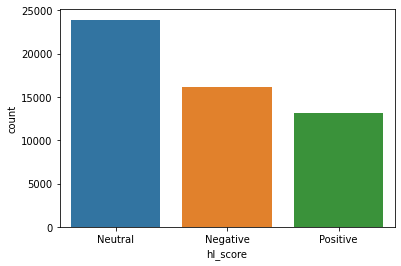

In [ ]:
sns.countplot(x='hl_score',data=all_headlines)



In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

In [ ]:
fig=px.pie(all_headlines,names='hl_score',title='Pie chart of different sentiments')
fig.show()



In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [ ]:
train_x_hl,test_x_hl,train_y_hl,test_y_hl=train_test_split(all_headlines['Headlines'],all_headlines.hl_score,test_size=0.1,random_state=212)



LINEAR SUPPORT VECTOR MACHINE

In [ ]:
pipe= Pipeline([('tfidf',TfidfVectorizer()),
                ('model',LinearSVC())])
linear_svc_model_hl=pipe.fit(train_x_hl,train_y_hl)
prediction=linear_svc_model_hl.predict(test_x_hl)
print('MODEL-LINEAR SVC')
print("accuracy score: {}%".format(round(accuracy_score(test_y_hl,prediction)*100,2)))
print(confusion_matrix(test_y_hl,prediction))
print(classification_report(test_y_hl,prediction))


MODEL-LINEAR SVC
accuracy score: 97.45%
[[1572   37   40]
 [   2 2321    3]
 [  41   13 1297]]
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1649
     Neutral       0.98      1.00      0.99      2326
    Positive       0.97      0.96      0.96      1351

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326



LOGISTIC REGRESSION

In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',LogisticRegression())])
log_model_hl=pipe.fit(train_x_hl,train_y_hl)
prediction=log_model_hl.predict(test_x_hl)
print('MODEL-LOGISTIC REGRESSION')
print("accuracy score: {}%".format(round(accuracy_score(test_y_hl,prediction)*100,2)))
print(confusion_matrix(test_y_hl,prediction))
print(classification_report(test_y_hl,prediction))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL-LOGISTIC REGRESSION
accuracy score: 94.18%
[[1479  118   52]
 [   3 2321    2]
 [  58   77 1216]]
              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1649
     Neutral       0.92      1.00      0.96      2326
    Positive       0.96      0.90      0.93      1351

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326



MULTINOMIAL NAIVE BAYES


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',MultinomialNB())])
MultinomialNB_model_hl=pipe.fit(train_x_hl,train_y_hl)
prediction=MultinomialNB_model_hl.predict(test_x_hl)
print('MultinomialNaive Bayes')
print("accuracy score: {}%".format(round(accuracy_score(test_y_hl,prediction)*100,2)))
print(confusion_matrix(test_y_hl,prediction))
print(classification_report(test_y_hl,prediction))


MultinomialNaive Bayes
accuracy score: 84.28%
[[1367  208   74]
 [  51 2251   24]
 [ 200  280  871]]
              precision    recall  f1-score   support

    Negative       0.84      0.83      0.84      1649
     Neutral       0.82      0.97      0.89      2326
    Positive       0.90      0.64      0.75      1351

    accuracy                           0.84      5326
   macro avg       0.86      0.81      0.83      5326
weighted avg       0.85      0.84      0.84      5326



BERNOULLI NAIVE BAYES


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',BernoulliNB())])
BernoulliNB_model_hl=pipe.fit(train_x_hl,train_y_hl)
prediction=BernoulliNB_model_hl.predict(test_x_hl)
print('BernoulliNaive Bayes')
print("accuracy score: {}%".format(round(accuracy_score(test_y_hl,prediction)*100,2)))
print(confusion_matrix(test_y_hl,prediction))
print(classification_report(test_y_hl,prediction))



BernoulliNaive Bayes
accuracy score: 88.96%
[[1451   66  132]
 [ 106 2146   74]
 [ 163   47 1141]]
              precision    recall  f1-score   support

    Negative       0.84      0.88      0.86      1649
     Neutral       0.95      0.92      0.94      2326
    Positive       0.85      0.84      0.85      1351

    accuracy                           0.89      5326
   macro avg       0.88      0.88      0.88      5326
weighted avg       0.89      0.89      0.89      5326



GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',GradientBoostingClassifier(loss='deviance',learning_rate=0.01,n_estimators=10,max_depth=5,random_state=55))])
GB_model_hl=pipe.fit(train_x_hl,train_y_hl)
prediction=GB_model_hl.predict(test_x_hl)
print('Gradient Boost')
print("accuracy score: {}%".format(round(accuracy_score(test_y_hl,prediction)*100,2)))
print(confusion_matrix(test_y_hl,prediction))
print(classification_report(test_y_hl,prediction))


Gradient Boost
accuracy score: 43.67%
[[   0 1649    0]
 [   0 2326    0]
 [   0 1351    0]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1649
     Neutral       0.44      1.00      0.61      2326
    Positive       0.00      0.00      0.00      1351

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',XGBClassifier(loss='deviance',learning_rate=0.01,n_estimators=10,max_depth=5,random_state=2020))])
XGB_model_hl=pipe.fit(train_x_hl,train_y_hl)
prediction=XGB_model_hl.predict(test_x_hl)
print('XGBoost')
print("accuracy score: {}%".format(round(accuracy_score(test_y_hl,prediction)*100,2)))
print(confusion_matrix(test_y_hl,prediction))
print(classification_report(test_y_hl,prediction))


XGBoost
accuracy score: 59.65%
[[ 449 1141   59]
 [   1 2323    2]
 [  35  911  405]]
              precision    recall  f1-score   support

    Negative       0.93      0.27      0.42      1649
     Neutral       0.53      1.00      0.69      2326
    Positive       0.87      0.30      0.45      1351

    accuracy                           0.60      5326
   macro avg       0.78      0.52      0.52      5326
weighted avg       0.74      0.60      0.55      5326



DECISION TREE CLASSIFICATION MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='best',random_state=2020))])
DT_model_hl=pipe.fit(train_x_hl,train_y_hl)
prediction=DT_model_hl.predict(test_x_hl)
print('Decision Tree')
print("accuracy score: {}%".format(round(accuracy_score(test_y_hl,prediction)*100,2)))
print(confusion_matrix(test_y_hl,prediction))
print(classification_report(test_y_hl,prediction))


Decision Tree
accuracy score: 59.14%
[[ 417 1175   57]
 [   0 2324    2]
 [  31  911  409]]
              precision    recall  f1-score   support

    Negative       0.93      0.25      0.40      1649
     Neutral       0.53      1.00      0.69      2326
    Positive       0.87      0.30      0.45      1351

    accuracy                           0.59      5326
   macro avg       0.78      0.52      0.51      5326
weighted avg       0.74      0.59      0.54      5326



K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
pipe= Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='brute'))])
KNN_model_hl=pipe.fit(train_x_hl,train_y_hl)
prediction=KNN_model_hl.predict(test_x_hl)
print('K Nearest Neighbors')
print("accuracy score: {}%".format(round(accuracy_score(test_y_hl,prediction)*100,2)))
print(confusion_matrix(test_y_hl,prediction))
print(classification_report(test_y_hl,prediction))



K Nearest Neighbors
accuracy score: 65.38%
[[ 918  589  142]
 [ 248 1925  153]
 [ 160  552  639]]
              precision    recall  f1-score   support

    Negative       0.69      0.56      0.62      1649
     Neutral       0.63      0.83      0.71      2326
    Positive       0.68      0.47      0.56      1351

    accuracy                           0.65      5326
   macro avg       0.67      0.62      0.63      5326
weighted avg       0.66      0.65      0.64      5326



In [ ]:
def compare_models(models,names,train_x_hl,train_y_hl,test_x_hl,test_y_hl):
  import sklearn.metrics as metrics
  from sklearn.model_selection import train_test_split
  for (model,name) in zip(models,names):
    y_pred= model.predict(test_x_hl)
    res=classification_report(test_y_hl,y_pred)
    print('Classification Report',res)
     

In [ ]:
models=[linear_svc_model_hl,log_model_hl,MultinomialNB_model_hl,BernoulliNB_model_hl,GB_model_hl,XGB_model_hl,DT_model_hl,KNN_model_hl]
names=['linearSVC','logistic','MultinomialNB','BernoulliNB','gradientBoost','XGB','decisionTree','knn']
compare_models(models,names,train_x_hl,train_y_hl,test_x_hl,test_y_hl)

Classification Report               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1649
     Neutral       0.98      1.00      0.99      2326
    Positive       0.97      0.96      0.96      1351

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

Classification Report               precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1649
     Neutral       0.92      1.00      0.96      2326
    Positive       0.96      0.90      0.93      1351

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

Classification Report               precision    recall  f1-score   support

    Negative       0.84      0.83      0.84      1649
     Neutral       0.82      0.97      0.89      2326
    Posit

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1649
     Neutral       0.44      1.00      0.61      2326
    Positive       0.00      0.00      0.00      1351

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326

Classification Report               precision    recall  f1-score   support

    Negative       0.93      0.27      0.42      1649
     Neutral       0.53      1.00      0.69      2326
    Positive       0.87      0.30      0.45      1351

    accuracy                           0.60      5326
   macro avg       0.78      0.52      0.52      5326
weighted avg       0.74      0.60      0.55      5326

Classification Report               precision    recall  f1-score   support

    Negative       0.93      0.25      0.40      1649
     Neutral       0.53      1.00      0.69      2326
    Posit

# now working with test data

In [ ]:
y_predicted=linear_svc_model_hl.predict(test_x_hl)
y_predicted


array(['Positive', 'Negative', 'Neutral', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [ ]:
predictions=pd.DataFrame(y_predicted)


In [ ]:
predictions.head()

,0
0,Positive
1,Negative
2,Neutral
3,Negative
4,Neutral


# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more 

In [ ]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_svc_model_hl.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [ ]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_svc_model_hl.predict(sent2)
y_predict

array(['Positive'], dtype=object)

# Conclusion

We learn about NLTK, sentiment analysis in this assigment.

we conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate
